In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

## Learning a sign wave only using numpy operations

In [6]:


#creating x dataset
X = np.linspace(-math.pi,math.pi,2000)

#creating a sign wave
Y = np.sin(X)




#initializing weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

#no of epochs
epochs = 2000

#our model, we are going to design a polynomial model for approximating sin wave

learning_rate = 1e-6
    

for epoch in range(epochs):
    
    #our model predcition
    y_hat = a*(X**3) + b*(X**2) + c*X + d
    #print(y_hat.shape)

    
    #calculating loss
    loss = np.square(Y-y_hat).sum()
    
    if epoch %100 ==99:
        
        #print(f"loss:{loss} epoch:{epoch}")
        pass
        
 
    #calculating gradients
    y_hat_grad = 2.0  *  (y_hat-Y)
    a_grad = ( (X**3) *  y_hat_grad).sum()
    b_grad = ( (X**2) *  y_hat_grad).sum()
    c_grad = (   X    *  y_hat_grad).sum()
    d_grad = (   1    *  y_hat_grad).sum()
    
    #correcting weights
    a -= learning_rate * a_grad
    b -= learning_rate * b_grad
    c -= learning_rate * c_grad
    d -= learning_rate * d_grad
    
    #print(a,b,c,d)

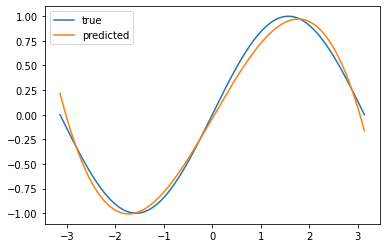

In [13]:
plt.plot(X,Y,label='true')
plt.plot(X,y_hat,label='predicted')
plt.legend()

## Learning a sign wave using pytorch operations

In [42]:
dtype  = torch.float
device = torch.device('cuda:0') #setting up tensors to use gpu for computation

X = torch.linspace(-math.pi,math.pi,2000,device = device,dtype = dtype)
Y = torch.sin(X)

#setup weights
a = torch.randn((),device = device,dtype=dtype,requires_grad = True)
b = torch.randn((),device = device,dtype=dtype,requires_grad = True)
c = torch.randn((),device = device,dtype=dtype,requires_grad = True)
d = torch.randn((),device = device,dtype=dtype,requires_grad = True)


learning_rate = 1e-3

epochs = 3000 #no of iterations 

for epoch in range(epochs):
    
    #forward pass
    y_hat = a*(X**3) + b*(X**2) + c*(X) + d
    
    #calcuate loss
    loss = torch.square(y_hat-Y).mean()
    
    #calculate gradients
    grad_a,grad_b,grad_c,grad_d = torch.autograd.grad(loss,(a,b,c,d)) # compute gradients of loss w.r.t to a,b,c,d
    
    #adjust weights
    
    with torch.no_grad():# with no grads  gradients are not accumulated as they usually do
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d
        
        
        grad_a,grad_b,grad_c,grad_d = 0,0,0,0
    


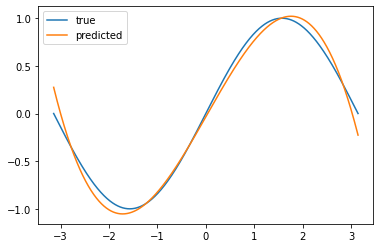

In [43]:
plt.plot(X.cpu(),Y.cpu(),label='true')
plt.plot(X.cpu(),y_hat.detach().cpu(),label='predicted')
plt.legend()

## Learning a sign wave using torch.nn module

torch.nn module allows us to define our own models as a sequence of layers

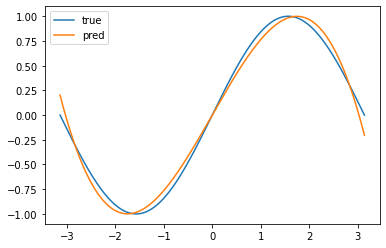

In [74]:
x = torch.linspace(-math.pi,math.pi,2000,device= device,dtype = dtype)
y = torch.sin(x)

#we want to approximate our sin wave using the polynomial fn
# y = x^3 + x^3 + x

power = torch.tensor([1,2,3],device = device)
xx = x.unsqueeze(-1).pow(power)

#defining our module

class MyModel(torch.nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        
    def forward(self,x):
        return self.a * x**3 + self.b * x**2 + self.c * x +self.d
    
    
#initialize model
model = MyModel()

#using custom definitions of loss fns
loss_fn = torch.nn.MSELoss()

learning_rate = 1e-3

for epoch in range(2000):
    
    
    #forward pass
    y_hat = model(x)
    
    
    #loss
    loss =loss_fn(y,y_hat)
    
    #zero the gradients before backpass
    model.zero_grad()
    
    
    #calculate gradients
    loss.backward()
    
    #update parameters
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            
plt.plot(x.cpu(),y.cpu(),label='true')
plt.plot(x.cpu(),y_pred.detach().cpu(),label='pred')
plt.legend()